<a href="https://colab.research.google.com/github/Abhilash-Bee/MachineLearning_DeepLearning_Projects/blob/main/Classification/Heart_Attack_Analysis_%26_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack Analysis & Prediction Dataset 🏩**

<img src='https://storage.googleapis.com/kaggle-datasets-images/1226038/2046696/2465e7cd117a6954befa50eff39d236f/dataset-cover.jpg?t=2021-03-22-11-33-17'>

> **About this dataset**


* `Age` --> Age of the patient

* `Sex` --> Sex of the patient

* `exang` --> exercise induced angina (1 = yes; 0 = no)

* `ca` --> number of major vessels (0-3)

* `cp` --> Chest Pain type chest pain type
 * `Value 1` --> typical angina
 * `Value 2` --> atypical angina
 * `Value 3` --> non-anginal pain
 * `Value 4` --> asymptomatic

* `trtbps` --> resting blood pressure (in mm Hg)

* `chol` --> cholestoral in mg/dl fetched via BMI sensor

* `fbs` --> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* `rest_ecg` --> resting electrocardiographic results
 * `Value 0` --> normal
 * `Value 1` --> having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 * `Value 2` --> showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` --> maximum heart rate achieved

* `target` --> 0 = less chance of heart attack 1 = more chance of heart attack

## Importing dependencies

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Getting the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/1. ClassificationProjects/3. Heart Attack Analysis/heart.csv')

data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [ ]:
data.drop(['oldpeak', 'slp', 'thall'], axis=1, inplace=True)

data.rename(columns={'restecg': 'rest_ecg',
                     'thalachh': 'thalach',
                     'exng': 'exang',
                     'caa': 'ca',
                     'output': 'target'}, inplace=True)

data.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  ca  target
0   63    1   3     145   233    1         0      150      0   0       1
1   37    1   2     130   250    0         1      187      0   0       1
2   41    0   1     130   204    0         0      172      0   0       1
3   56    1   1     120   236    0         1      178      0   0       1
4   57    0   0     120   354    0         1      163      1   0       1

## EDA (Exploratory Data Analysis)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   rest_ecg  303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   ca        303 non-null    int64
 10  target    303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [ ]:
data.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
rest_ecg  303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

### Converting the data into categorical form

In [ ]:
data_param = {
    'sex': {0: 'Female', 1: 'Male'},
    'cp': {0: 'typical', 1: 'atypical', 2: 'non-anginal', 3: 'asymptomatic'},
    'fbs': {1: '>120mg/dl', 0: '<120mg/dl'},
    'rest_ecg': {0: 'normal', 1: 'abnormal', 2: 'probable'},
    'exang': {1: 'yes', 0: 'no'},
    'target': {0: 'less', 1: 'more'},
}

data_cat = data.copy()

for col in data.columns:
    if col in list(data_param.keys()):
        data_cat[col] = data[col].map(data_param[col])


data_cat.head()

age     sex            cp  trtbps  chol        fbs  rest_ecg  thalach  \
0   63    Male  asymptomatic     145   233  >120mg/dl    normal      150   
1   37    Male   non-anginal     130   250  <120mg/dl  abnormal      187   
2   41  Female      atypical     130   204  <120mg/dl    normal      172   
3   56    Male      atypical     120   236  <120mg/dl  abnormal      178   
4   57  Female       typical     120   354  <120mg/dl  abnormal      163   

  exang  ca target  
0    no   0   more  
1    no   0   more  
2    no   0   more  
3    no   0   more  
4   yes   0   more

In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0d4bf73f005f82f7685fb9259050aac8bad61e2cb221cbdb2603158c4a4da19e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data_cat)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Removing duplicate elements

In [ ]:
index = data[data.duplicated() == True].index[0]
data.drop_duplicates(inplace=True)

index = data_cat[data_cat.duplicated() == True].index[0]
data_cat.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum(), data_cat.duplicated().sum()

(0, 0)

### Univariate Analysis

In [ ]:
import warnings

warnings.filterwarnings('ignore')

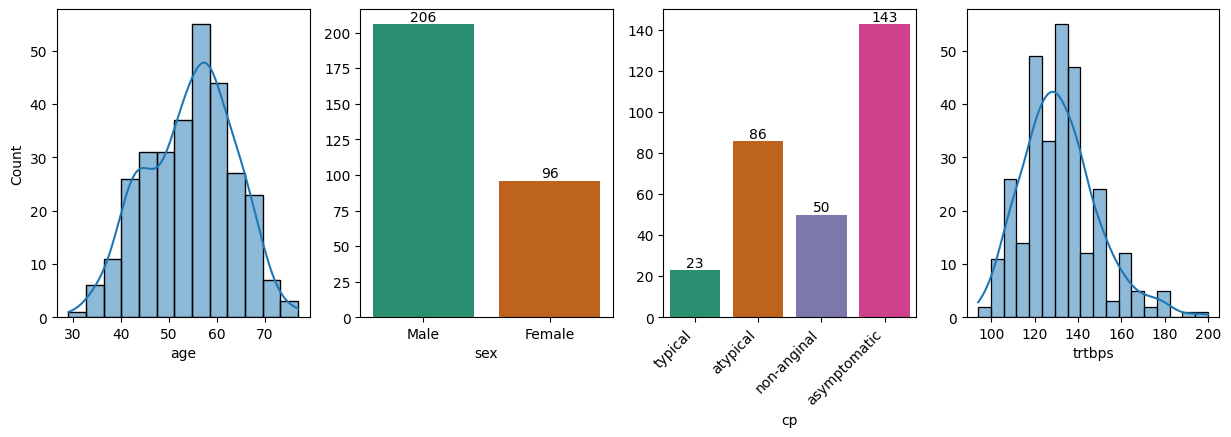

In [ ]:
# @title 1st set

fig, ax = plt.subplots(1, 4, figsize=(15, 4))

# 1st figure
sns.histplot(data_cat['age'], kde=True, ax=ax[0])

# 2nd figure
sns.countplot(data_cat, x='sex', ax=ax[1], palette=sns.palettes.mpl_palette('Dark2'))
ax[1].set_ylabel('')
for containers in ax[1].containers:
    ax[1].bar_label(containers)

# 3rd figure
sns.countplot(data_cat, x='cp', ax=ax[2], palette=sns.palettes.mpl_palette('Dark2'))
ax[2].set_ylabel('')
ax[2].set_xticklabels(data_param['cp'].values(), rotation=45, ha='right')
for containers in ax[2].containers:
    ax[2].bar_label(containers)

# 4th figure
sns.histplot(data_cat['trtbps'], ax=ax[3], kde=True)
ax[3].set_ylabel('');

In [ ]:
# @title 2nd set

fig, ax = plt.subplots(1, 4, figsize=(15, 4))

# 1st figure
sns.histplot(data_cat['chol'], kde=True, ax=ax[0])

# 2nd figure
sns.countplot(data_cat, x='fbs', ax=ax[1], palette=sns.palettes.mpl_palette('Dark2'))
for containers in ax[1].containers:
    ax[1].bar_label(containers)
ax[1].set_ylabel('')

# 3rd figure
sns.countplot(data_cat, x='rest_ecg', ax=ax[2], palette=sns.palettes.mpl_palette('Dark2'))
for containers in ax[2].containers:
    ax[2].bar_label(containers)
ax[2].set_ylabel('')

# 4th figure
sns.histplot(data_cat['thalach'], ax=ax[3], kde=True)
ax[3].set_ylabel('');

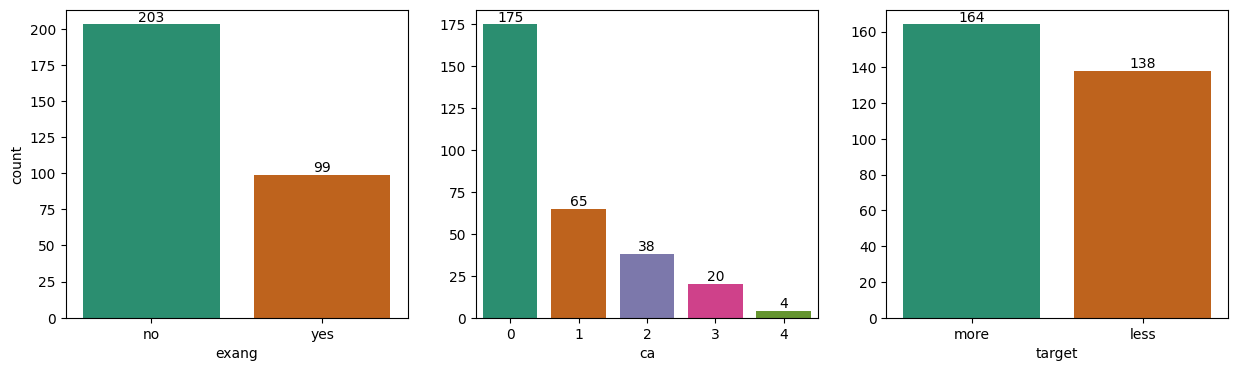

In [ ]:
# @title 3rd set

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# 1st figure
sns.countplot(data_cat, x='exang', ax=ax[0], palette=sns.palettes.mpl_palette('Dark2'))
for containers in ax[0].containers:
    ax[0].bar_label(containers)

# 2nd figure
sns.countplot(data_cat, x='ca', ax=ax[1], palette=sns.palettes.mpl_palette('Dark2'))
for containers in ax[1].containers:
    ax[1].bar_label(containers)
ax[1].set_ylabel('')

# 3rd figure
sns.countplot(data_cat, x='target', ax=ax[2], palette=sns.palettes.mpl_palette('Dark2'))
for containers in ax[2].containers:
    ax[2].bar_label(containers)
ax[2].set_ylabel('');

### Bivariate Analysis

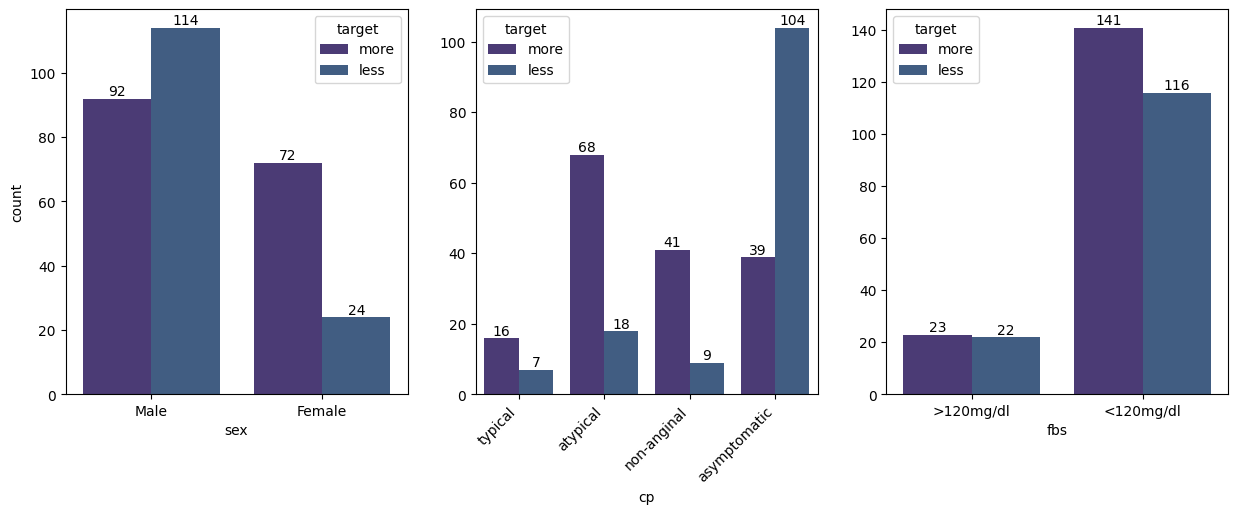

In [ ]:
# @title 1st set

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# 1st figure
sns.countplot(data_cat, x='sex', hue='target', ax=ax[0], palette=sns.palettes.mpl_palette('viridis'))
for containers in ax[0].containers:
    ax[0].bar_label(containers)

# 2nd figure
sns.countplot(data_cat, x='cp', hue='target', ax=ax[1], palette=sns.palettes.mpl_palette('viridis'))
ax[1].set_ylabel('')
ax[1].set_xticklabels(data_param['cp'].values(), rotation=45, ha='right')
for containers in ax[1].containers:
    ax[1].bar_label(containers)

# 3rd figure
sns.countplot(data_cat, x='fbs', hue='target', ax=ax[2], palette=sns.palettes.mpl_palette('viridis'))
for containers in ax[2].containers:
    ax[2].bar_label(containers)
ax[2].set_ylabel('');

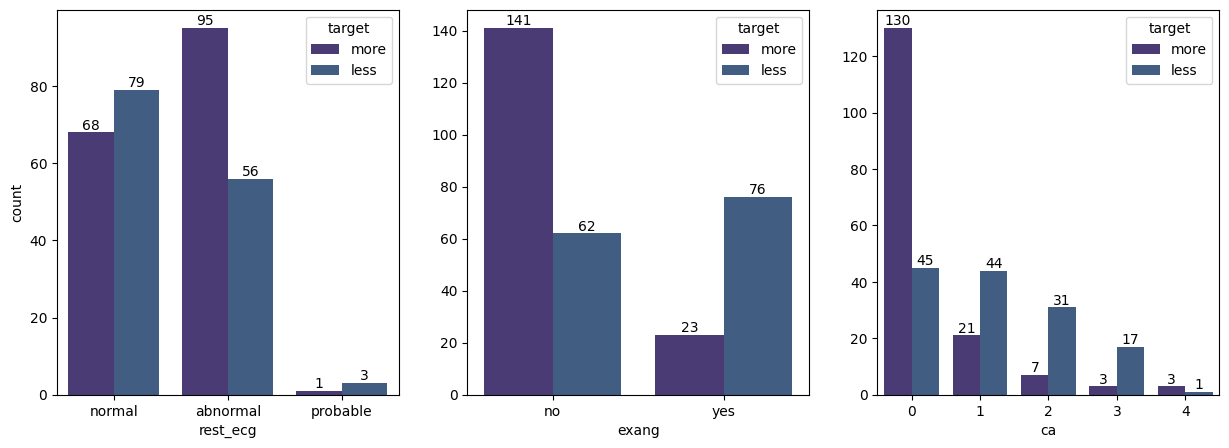

In [ ]:
# @title 2nd set

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# 1st figure
sns.countplot(data_cat, x='rest_ecg', hue='target', ax=ax[0], palette=sns.palettes.mpl_palette('viridis'))
for containers in ax[0].containers:
    ax[0].bar_label(containers)

# 2nd figure
sns.countplot(data_cat, x='exang', hue='target', ax=ax[1], palette=sns.palettes.mpl_palette('viridis'))
for containers in ax[1].containers:
    ax[1].bar_label(containers)
ax[1].set_ylabel('')

# 3rd figure
sns.countplot(data_cat, x='ca', hue='target', ax=ax[2], palette=sns.palettes.mpl_palette('viridis'))
for containers in ax[2].containers:
    ax[2].bar_label(containers)
ax[2].set_ylabel('');

### Multivariate Analysis

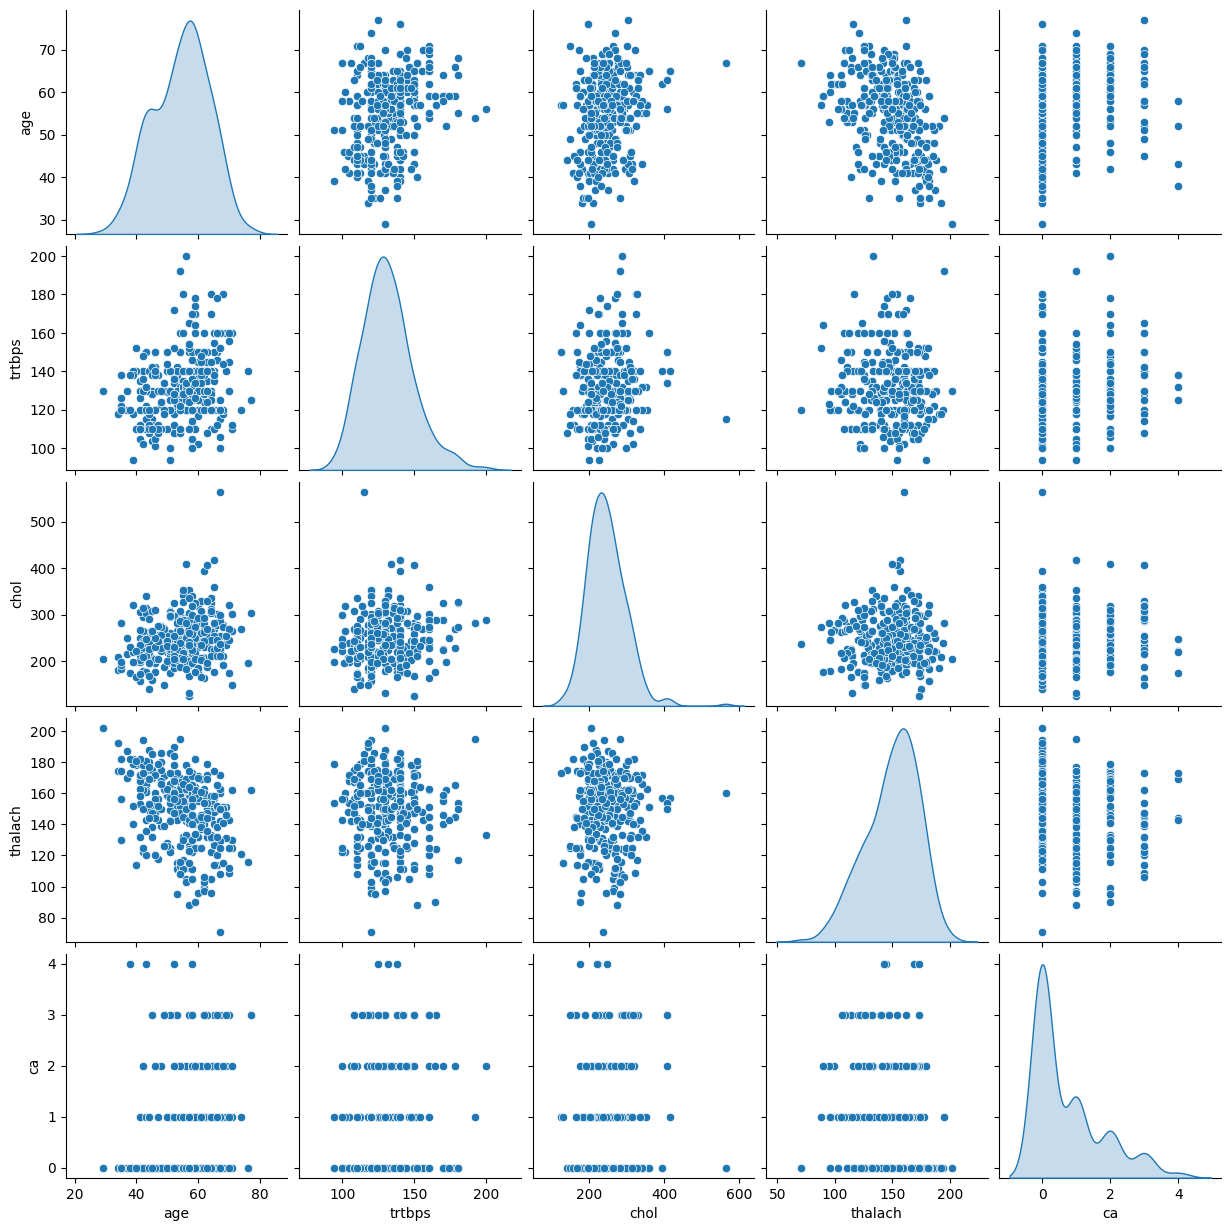

In [ ]:
sns.pairplot(data_cat, diag_kind='kde');

### Checking for outliers

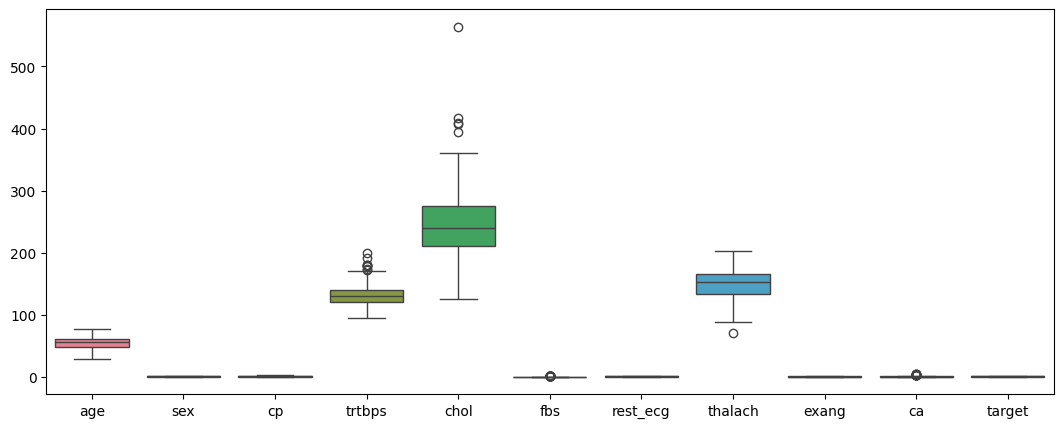

In [ ]:
fig = plt.figure(figsize=(13, 5))
sns.boxplot(data);

### Feature engineering

In [ ]:
data.age.describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [ ]:
data['age'] = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70, 80])

data.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  ca  target
0  (60, 70]    1   3     145   233    1         0      150      0   0       1
1  (30, 40]    1   2     130   250    0         1      187      0   0       1
2  (40, 50]    0   1     130   204    0         0      172      0   0       1
3  (50, 60]    1   1     120   236    0         1      178      0   0       1
4  (50, 60]    0   0     120   354    0         1      163      1   0       1

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['age'] = encoder.fit_transform(data['age'])

data.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  ca  target
0    4    1   3     145   233    1         0      150      0   0       1
1    1    1   2     130   250    0         1      187      0   0       1
2    2    0   1     130   204    0         0      172      0   0       1
3    3    1   1     120   236    0         1      178      0   0       1
4    3    0   0     120   354    0         1      163      1   0       1

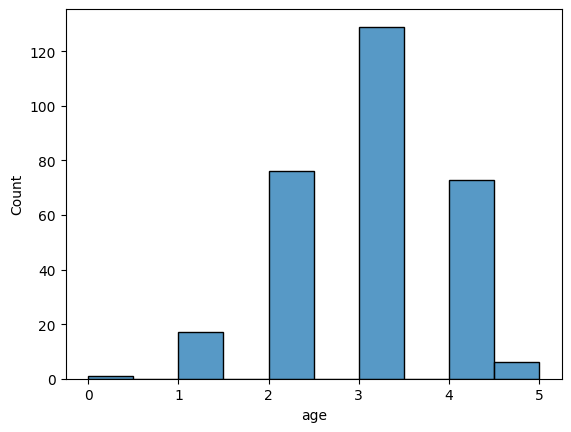

In [ ]:
sns.histplot(data['age']);

### Correlation matrix

In [ ]:
corr = data.corr()

corr.nlargest(4, 'target')['target'], corr.nsmallest(8, 'target')['target']

(target      1.000000
 cp          0.432080
 thalach     0.419955
 rest_ecg    0.134874
 Name: target, dtype: float64,
 exang      -0.435601
 ca         -0.408992
 sex        -0.283609
 age        -0.167407
 trtbps     -0.146269
 chol       -0.081437
 fbs        -0.026826
 rest_ecg    0.134874
 Name: target, dtype: float64)

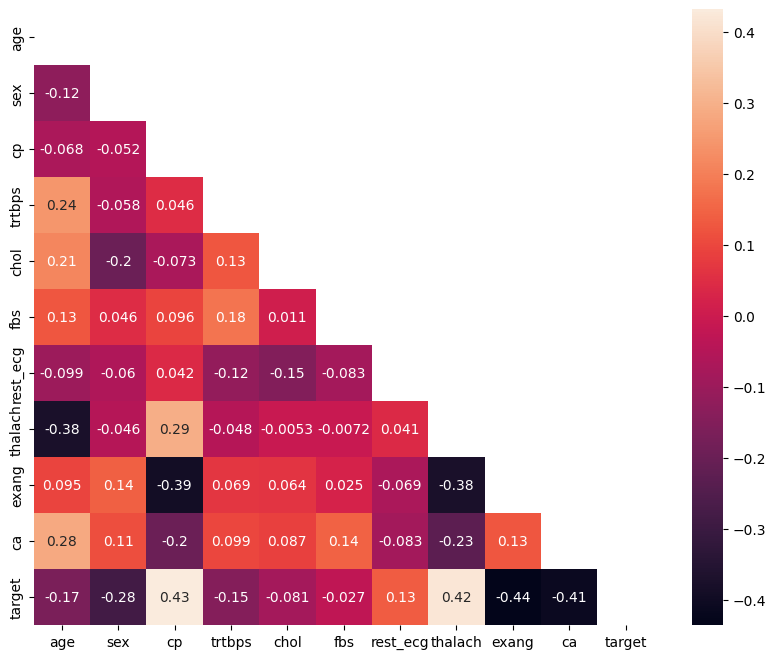

In [ ]:
mask = np.triu(corr)
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True);

### Splitting the data

In [ ]:
X, y = data.drop('target', axis=1), data['target']

X.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  ca
0    4    1   3     145   233    1         0      150      0   0
1    1    1   2     130   250    0         1      187      0   0
2    2    0   1     130   204    0         0      172      0   0
3    3    1   1     120   236    0         1      178      0   0
4    3    0   0     120   354    0         1      163      1   0

In [ ]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((256, 10), (256,), (46, 10), (46,))

### Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
scaling.fit(X_train)

X_train = pd.DataFrame(scaling.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaling.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train.head()

age       sex        cp    trtbps      chol       fbs  rest_ecg  \
22  -0.998934  0.680336 -0.970638  0.495035 -0.403489 -0.397959  0.905130   
0    1.254169  0.680336  1.918704  0.787846 -0.262102  2.512824 -1.009856   
88   0.127617 -1.469862  0.955590 -1.261835 -0.645867 -0.397959  0.905130   
17   1.254169 -1.469862  1.918704  1.080658 -0.403489 -0.397959  0.905130   
288  0.127617  0.680336 -0.970638 -1.261835  1.798107 -0.397959  0.905130   

      thalach     exang        ca  
22   1.297160 -0.698836 -0.687117  
0    0.047255 -0.698836 -0.687117  
88   0.404371 -0.698836 -0.687117  
17  -1.559765 -0.698836 -0.687117  
288 -0.265221  1.430950  0.347600

## Model creation

In [ ]:
!wget https://raw.githubusercontent.com/Abhilash-Bee/MachineLearning_DeepLearning_Projects/main/extras/helper_function.py

--2024-03-09 12:46:57--  https://raw.githubusercontent.com/Abhilash-Bee/MachineLearning_DeepLearning_Projects/main/extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8016 (7.8K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   7.83K  --.-KB/s    in 0s      

2024-03-09 12:46:57 (73.1 MB/s) - ‘helper_function.py’ saved [8016/8016]



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (GradientBoostingClassifier,
                              HistGradientBoostingClassifier,
                              RandomForestClassifier,
                              BaggingClassifier,
                              StackingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (accuracy_score,
                             precision_recall_fscore_support,
                             ConfusionMatrixDisplay,
                             RocCurveDisplay)

from sklearn.model_selection import (cross_val_score,
                                     StratifiedKFold,
                                     GridSearchCV)

from helper_function import *

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(random_state=8),
    'DecisionTree': DecisionTreeClassifier(random_state=8),
    'GradientBoosting': GradientBoostingClassifier(random_state=8),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=8),
    'KNN': KNeighborsClassifier(n_neighbors=2),
    'RandomForest': RandomForestClassifier(random_state=8),
    'Bagging': BaggingClassifier(random_state=8),
    'XGB': XGBClassifier(),
}

In [ ]:
train_results = []
val_results = []

for name, model in models.items():
    result = cross_val_score(model, X=X_train, y=y_train, scoring='f1', cv=StratifiedKFold())
    train_results.append(np.mean(result))

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    val_results.append(calculate_results(name, y_test, y_pred))

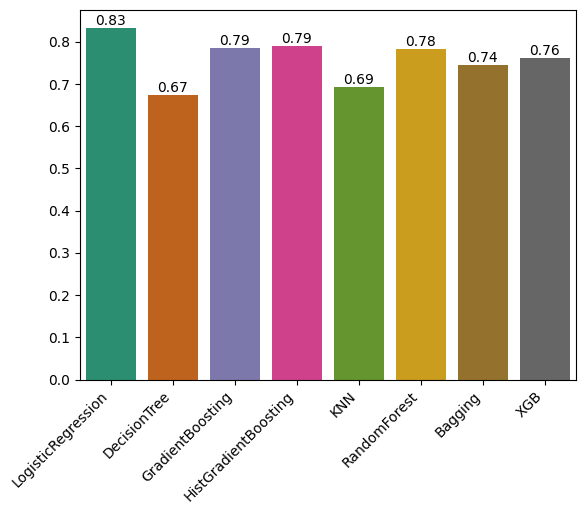

In [ ]:
# @title Train data score

ax = sns.barplot(x=list(models.keys()), y=train_results, palette='Dark2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
ax.set_xticklabels(list(models.keys()), rotation=45, ha='right');

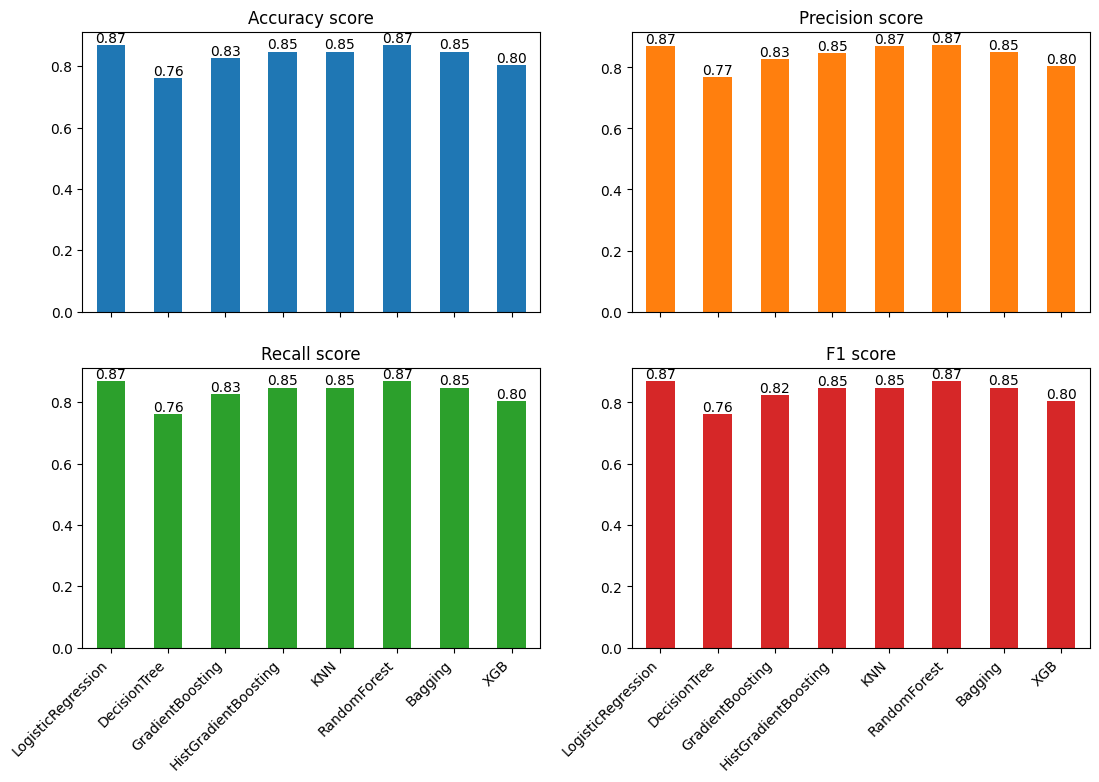

In [ ]:
# @title Validation data score

axis = pd.DataFrame(val_results).plot(kind='bar', subplots=True, figsize=(13, 8), layout=(2, 2))
for ax in axis.flatten():
    ax.get_legend().remove()
    ax.set_xticklabels(list(models.keys()), rotation=45, ha='right')
    ax.bar_label(ax.containers[0], fmt='%.2f');

In [ ]:
train_results, test_results  = [], []

In [ ]:
def pre_result_calculator(name, model):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_score = calculate_results(name, y_train, train_pred)
    test_score = calculate_results(name, y_test, test_pred)

    train_results.append(train_score)
    test_results.append(test_score)

    return (y_train, train_pred), \
     (y_test, test_pred), \
     pd.DataFrame(train_score, index=[0]), \
     pd.DataFrame(test_score, index=[0])

In [ ]:
def plot(train, test):
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    fig.set_tight_layout({'pad': 5.0,
                          'w_pad': 5.0,
                          'h_pad': 5.0})
    ax = ax.flatten()

    ConfusionMatrixDisplay.from_predictions(train[0], train[1], cmap=plt.cm.Blues, ax=ax[0])
    ax[0].set_title('Train Confusion Matrix')
    RocCurveDisplay.from_predictions(train[0], train[1], ax=ax[1])
    ax[1].set_title('Train Roc Curve')

    ConfusionMatrixDisplay.from_predictions(test[0], test[1], cmap=plt.cm.Blues, ax=ax[2])
    ax[2].set_title('Validation Confusion Matrix')
    RocCurveDisplay.from_predictions(test[0], test[1], ax=ax[3])
    ax[3].set_title('Validation Roc Curve')

In [ ]:
best_models = ['LogisticRegression', 'GradientBoosting', 'HistGradientBoosting', 'RandomForest', 'Bagging', 'XGB']
best_models_tuned = ['LogisticRegressionTuned', 'GradientBoostingTuned', 'HistGradientBoostingTuned', 'XGBTuned']

### Model 0 - LogisticRegression

           Model Name  Accuracy score  Precision score  Recall score  F1 score
0  LogisticRegression        0.824219         0.826233      0.824219  0.823049
           Model Name  Accuracy score  Precision score  Recall score  F1 score
0  LogisticRegression        0.869565         0.869565      0.869565  0.869565


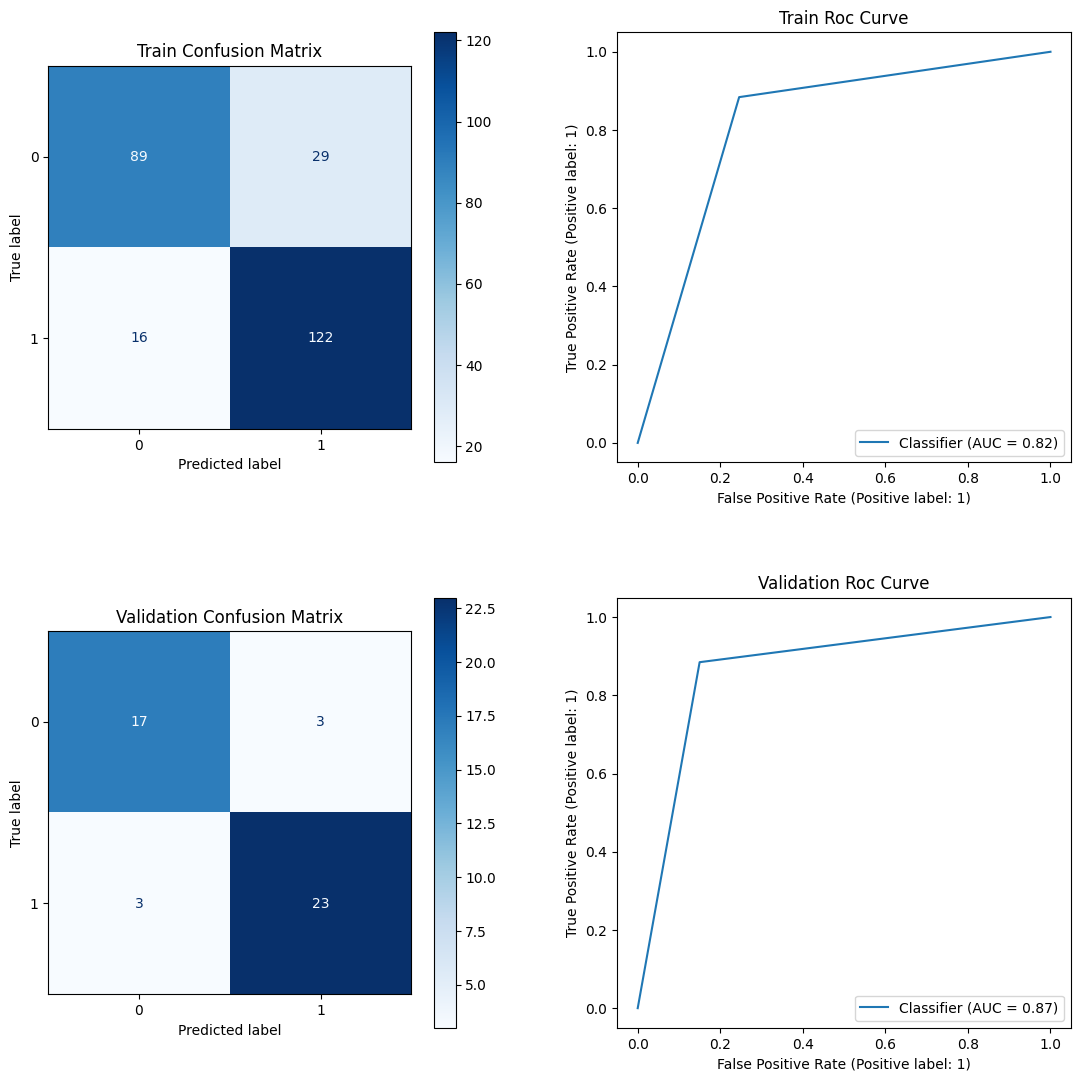

In [ ]:
lr = LogisticRegression(random_state=8)
lr.fit(X_train, y_train)

results = pre_result_calculator(best_models[0], lr)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

### Model 1 - GradientBoosting

         Model Name  Accuracy score  Precision score  Recall score  F1 score
0  GradientBoosting        0.984375         0.984815      0.984375  0.984352
         Model Name  Accuracy score  Precision score  Recall score  F1 score
0  GradientBoosting        0.826087         0.826605      0.826087  0.824731


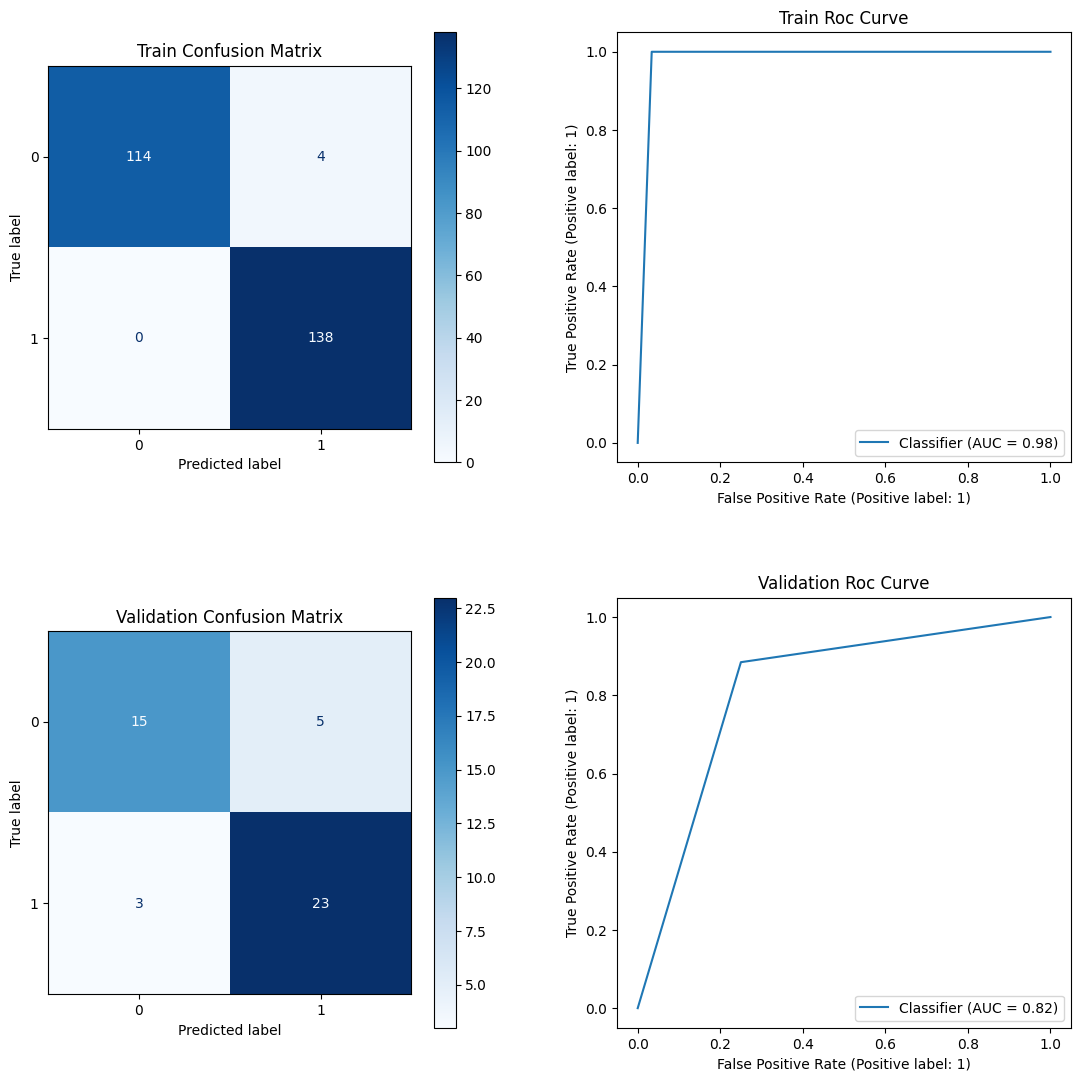

In [ ]:
gb = GradientBoostingClassifier(random_state=8)
gb.fit(X_train, y_train)

results = pre_result_calculator(best_models[1], gb)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

### Model 2 - HistGradientBoosting

             Model Name  Accuracy score  Precision score  Recall score  \
0  HistGradientBoosting        0.988281         0.988304      0.988281   

   F1 score  
0  0.988277  
             Model Name  Accuracy score  Precision score  Recall score  \
0  HistGradientBoosting        0.847826         0.847614      0.847826   

   F1 score  
0  0.847311  


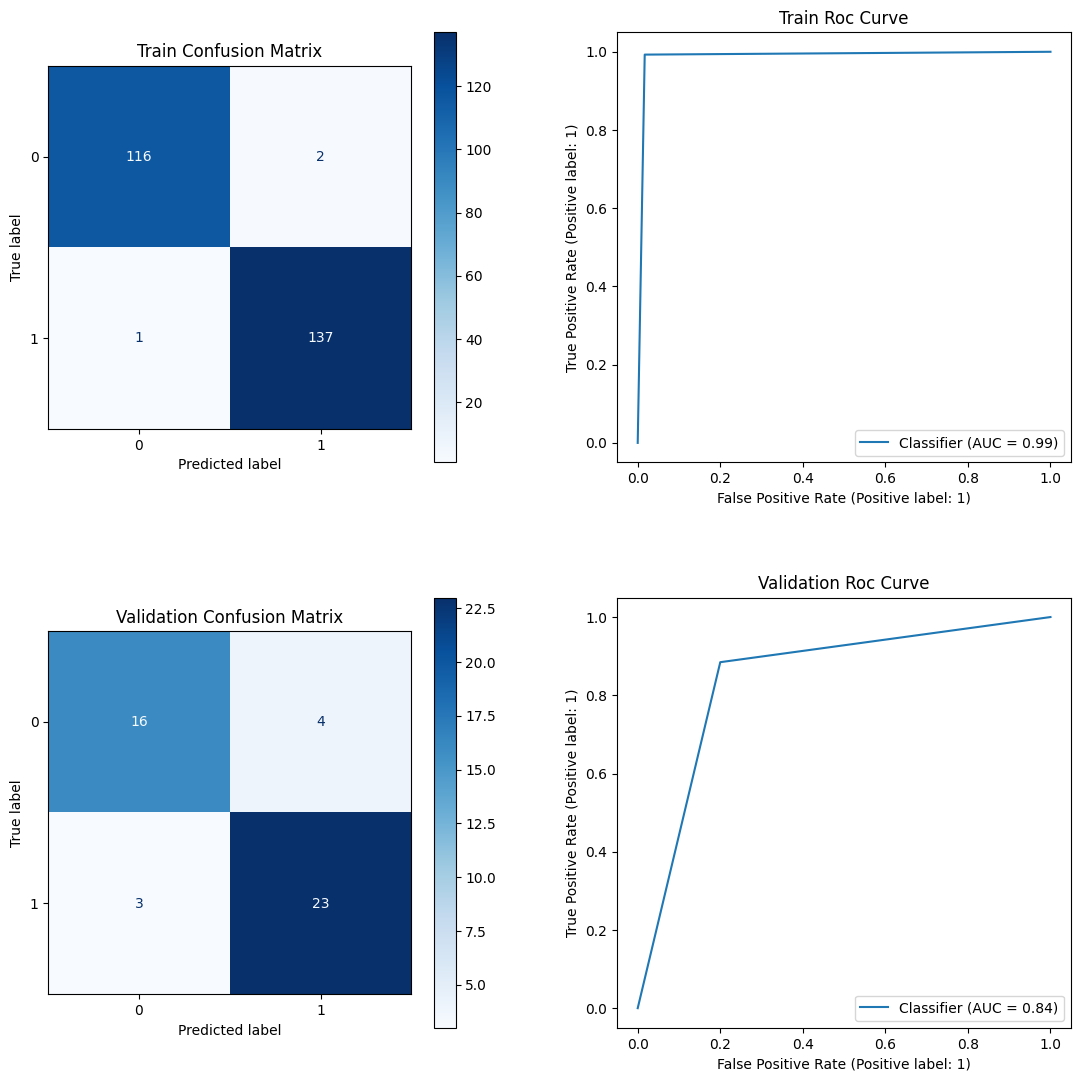

In [ ]:
hgb = HistGradientBoostingClassifier(random_state=8)
hgb.fit(X_train, y_train)

results = pre_result_calculator(best_models[2], hgb)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

### Model 3 - RandomForest

     Model Name  Accuracy score  Precision score  Recall score  F1 score
0  RandomForest             1.0              1.0           1.0       1.0
     Model Name  Accuracy score  Precision score  Recall score  F1 score
0  RandomForest        0.869565         0.873847      0.869565  0.870062


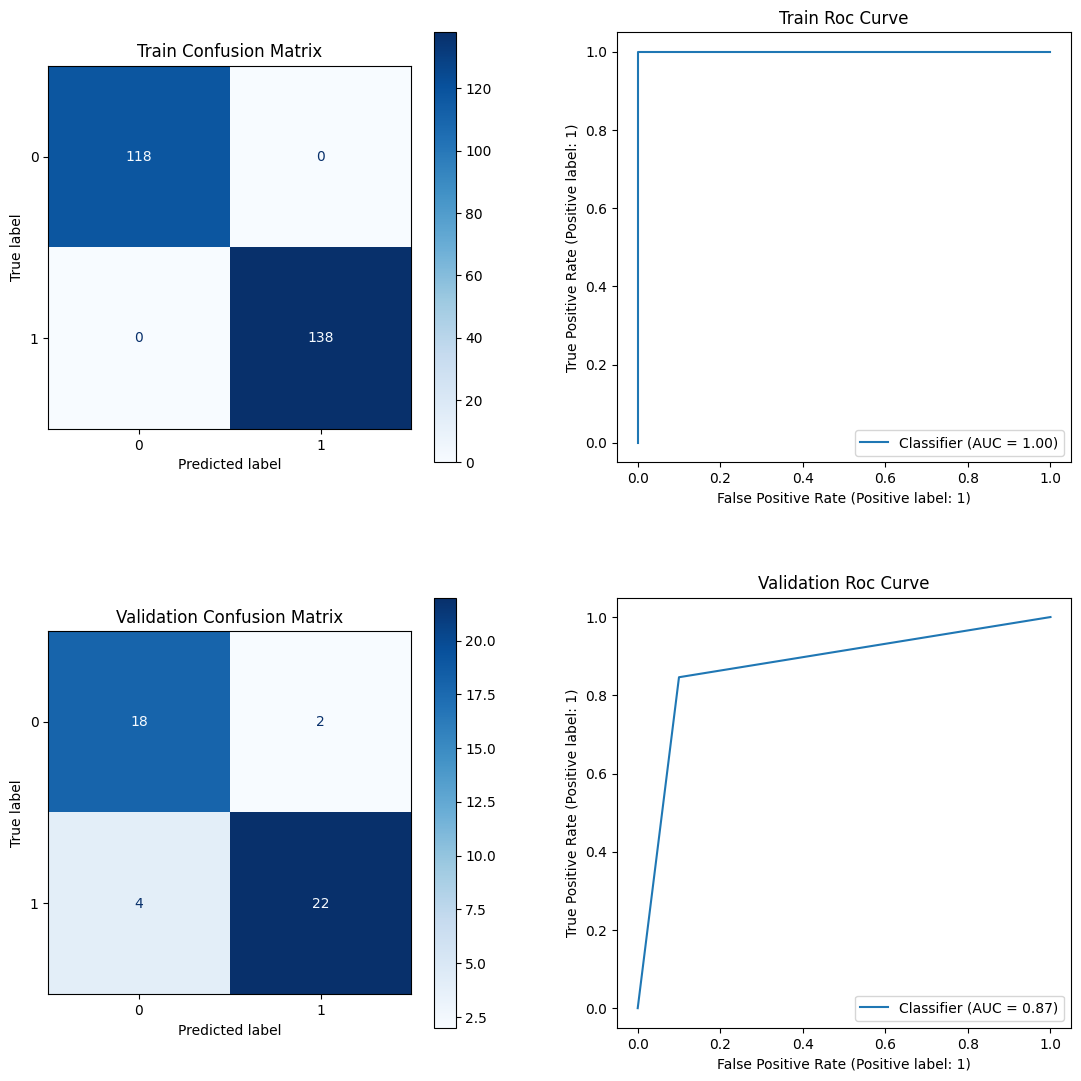

In [ ]:
rf = RandomForestClassifier(random_state=8)
rf.fit(X_train, y_train)

results = pre_result_calculator(best_models[3], rf)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

### Model 4 - Bagging

  Model Name  Accuracy score  Precision score  Recall score  F1 score
0    Bagging        0.980469          0.98051      0.980469  0.980474
  Model Name  Accuracy score  Precision score  Recall score  F1 score
0    Bagging        0.847826         0.849358      0.847826   0.84819


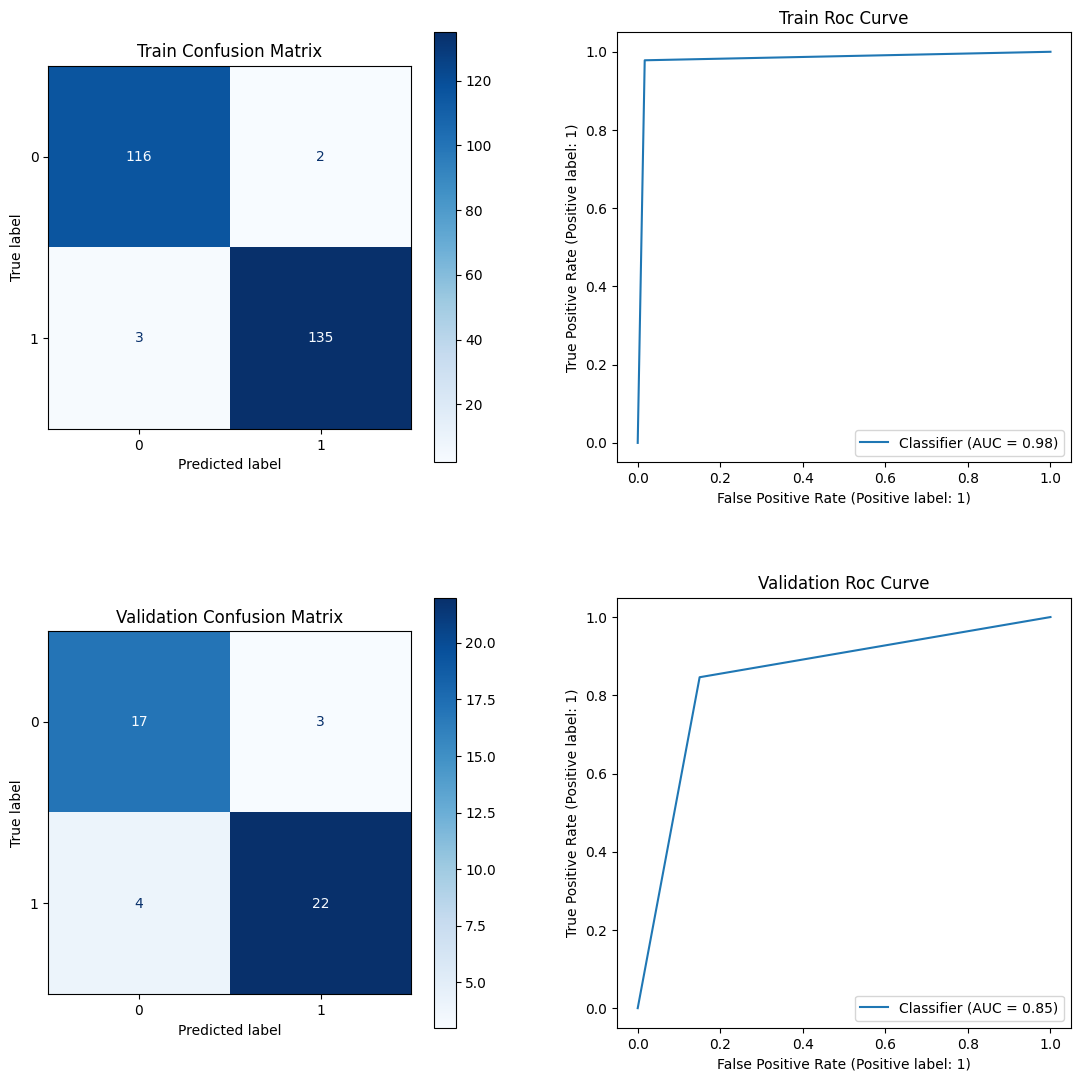

In [ ]:
bg = BaggingClassifier(random_state=8)
bg.fit(X_train, y_train)

results = pre_result_calculator(best_models[4], bg)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

### Model 5 - XGB

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

results = pre_result_calculator(best_models[5], xgb)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

  Model Name  Accuracy score  Precision score  Recall score  F1 score
0        XGB             1.0              1.0           1.0       1.0
  Model Name  Accuracy score  Precision score  Recall score  F1 score
0        XGB        0.804348         0.803797      0.804348  0.803685


## Results

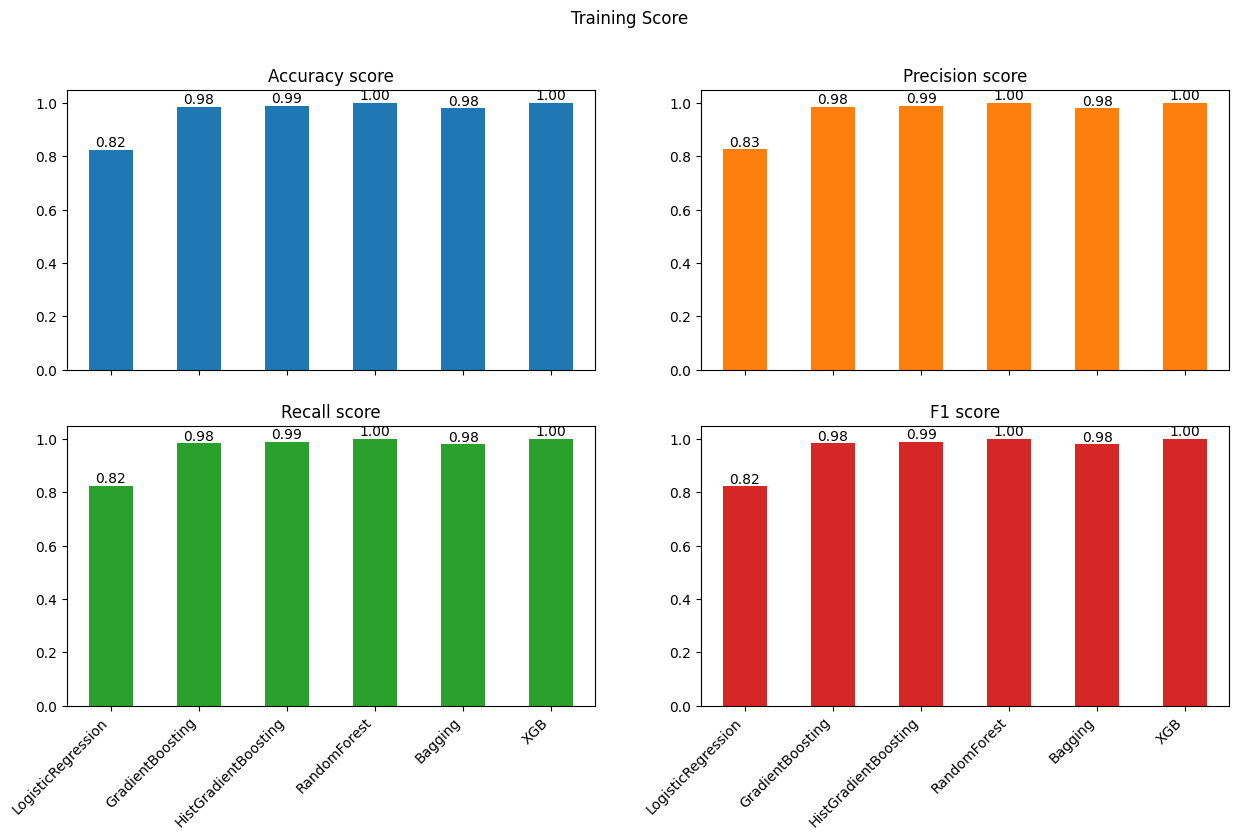

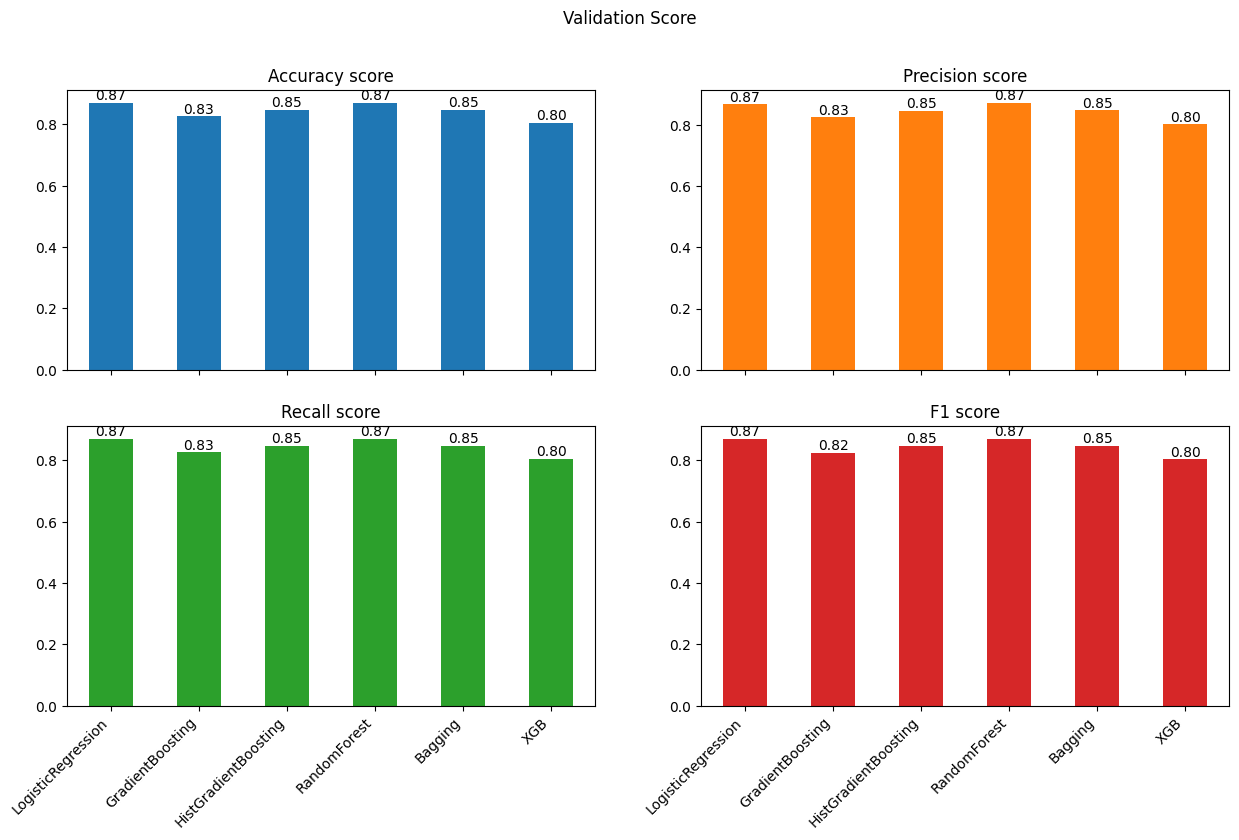

In [ ]:
# @title Graph

ax = pd.DataFrame(train_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Training Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(best_models, rotation=45, ha='right')

ax = pd.DataFrame(test_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Validation Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(best_models, rotation=45, ha='right');

## Tuning models

In [ ]:
train_tuned_results, test_tuned_results = [], []

def pre_tuned_result_calculator(name, model):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_score = calculate_results(name, y_train, train_pred)
    test_score = calculate_results(name, y_test, test_pred)

    train_tuned_results.append(train_score)
    test_tuned_results.append(test_score)

    return (y_train, train_pred), \
     (y_test, test_pred), \
     pd.DataFrame(train_score, index=[0]), \
     pd.DataFrame(test_score, index=[0])

### Model 0 - LogisticRegression Tuning

In [ ]:
lr_tuned = LogisticRegression(random_state=8)

params = {
    'max_iter': [100, 400, 800, 1000],
    'solver': ['lbfgs', 'liblinear', 'newton-cg'],
    }

grid = GridSearchCV(lr_tuned, params, scoring='f1', cv=StratifiedKFold(), n_jobs=-1)
grid.fit(X_train, y_train)
lr_tuned = grid.best_estimator_
lr_tuned

LogisticRegression(random_state=8)

                Model Name  Accuracy score  Precision score  Recall score  \
0  LogisticRegressionTuned        0.824219         0.826233      0.824219   

   F1 score  
0  0.823049  
                Model Name  Accuracy score  Precision score  Recall score  \
0  LogisticRegressionTuned        0.869565         0.869565      0.869565   

   F1 score  
0  0.869565  


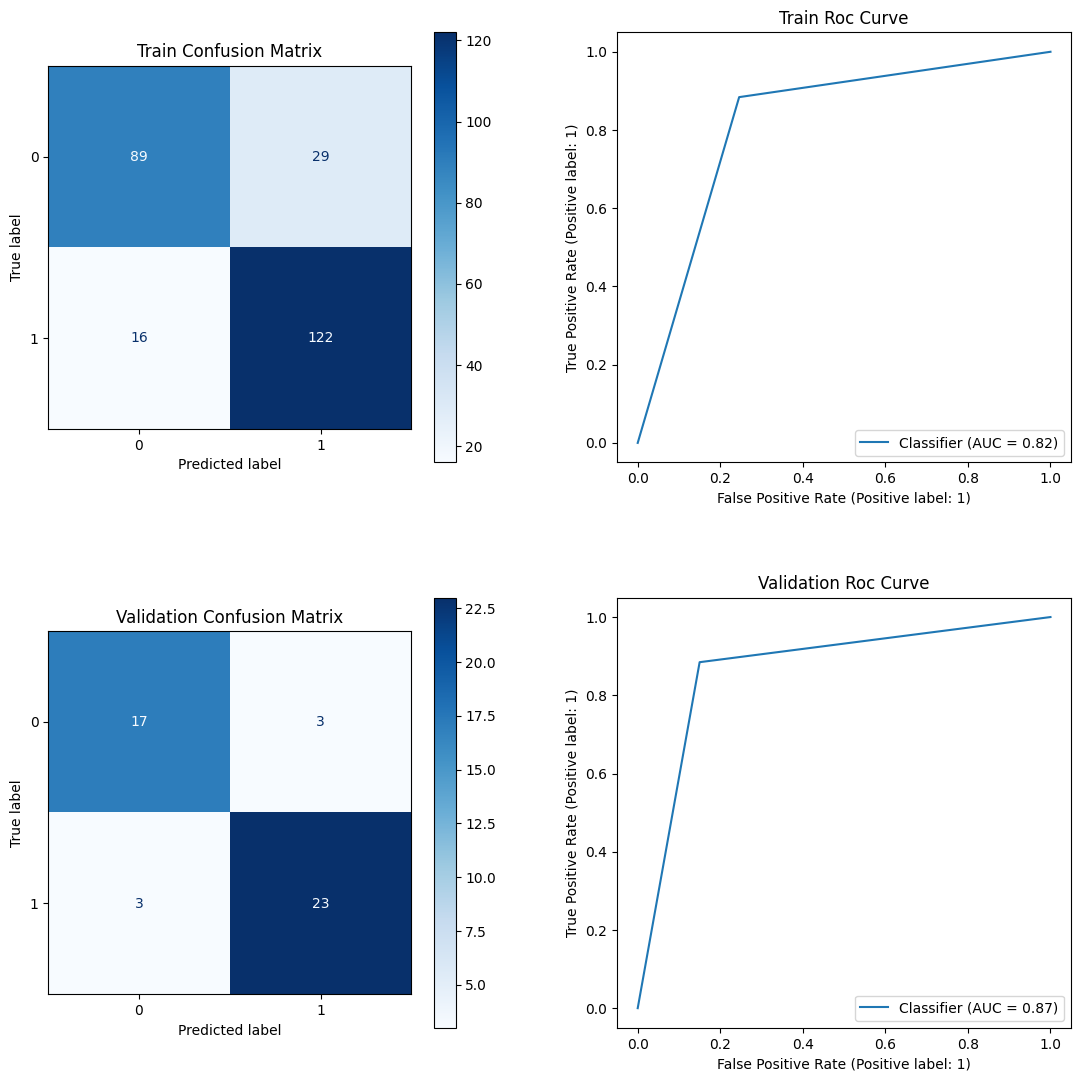

In [ ]:
lr_tuned.fit(X_train, y_train)
results = pre_tuned_result_calculator(best_models_tuned[0], lr_tuned)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

### Model 1 - GradientBoosting Tuning

In [ ]:
gb_tuned = GradientBoostingClassifier(random_state=8)

params = {
    'loss': ['log_loss', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [3, 4, 5],
    'max_features': [None, 'auto', 'sqrt'],
    'n_estimators': [100, 120, 140, 160],
}

grid = GridSearchCV(gb_tuned, params, scoring='f1', cv=StratifiedKFold(), n_jobs=-1)
grid.fit(X_train, y_train)
gb_tuned = grid.best_estimator_
gb_tuned

GradientBoostingClassifier(max_features='sqrt', n_estimators=120,
                           random_state=8)

              Model Name  Accuracy score  Precision score  Recall score  \
0  GradientBoostingTuned        0.984375         0.984475      0.984375   

   F1 score  
0  0.984364  
              Model Name  Accuracy score  Precision score  Recall score  \
0  GradientBoostingTuned        0.847826         0.847614      0.847826   

   F1 score  
0  0.847311  


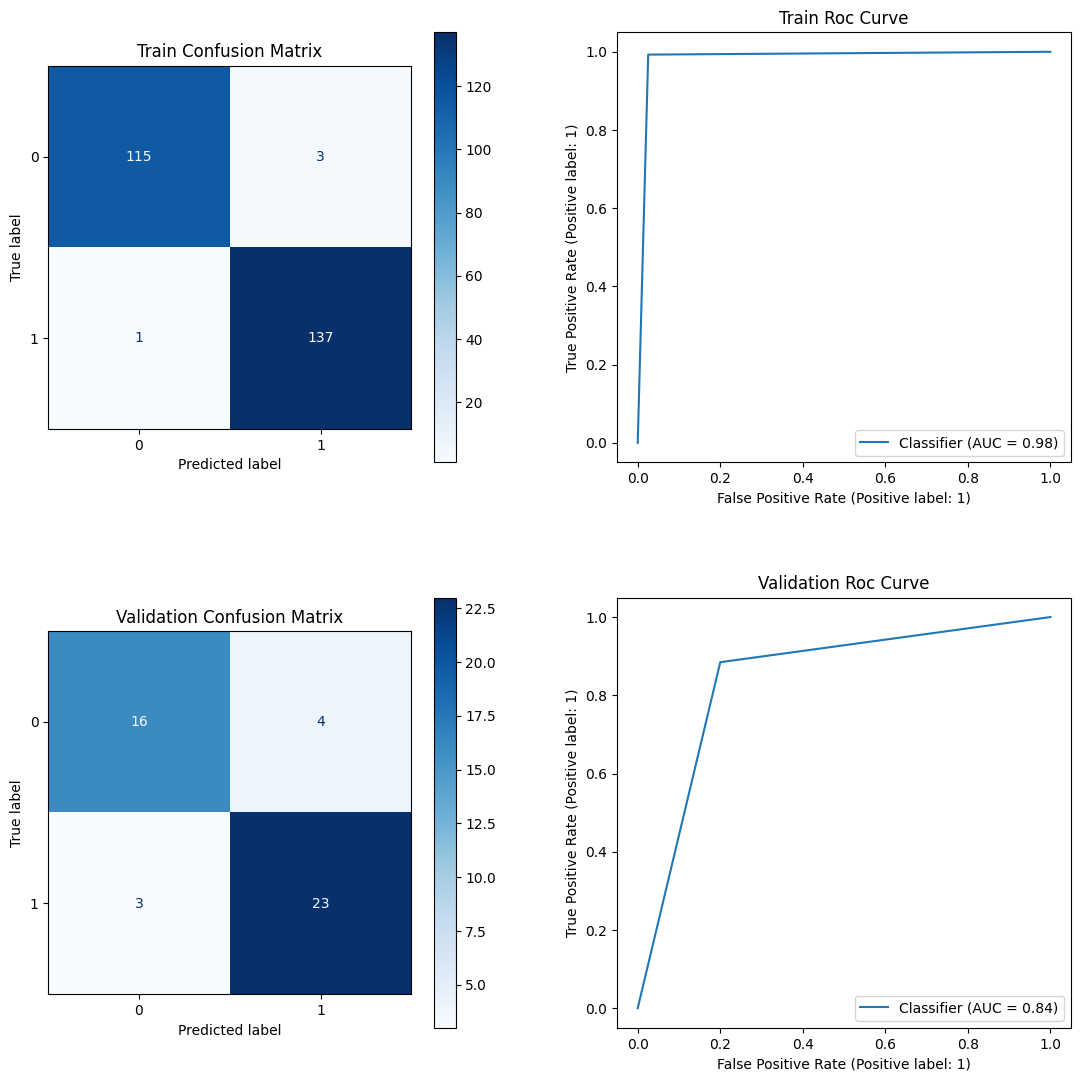

In [ ]:
gb_tuned.fit(X_train, y_train)
results = pre_tuned_result_calculator(best_models_tuned[1], gb_tuned)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

### Model 2 - HistGradientBoosting Tuning

In [ ]:
hgb_tuned = HistGradientBoostingClassifier(random_state=8)

params = {
    'max_depth': [1, 3, 5, 7],
    'max_iter': [100, 300, 600, 900, 1000]
    }

grid = GridSearchCV(hgb_tuned, params, scoring='f1', cv=StratifiedKFold(), n_jobs=-1)
grid.fit(X_train, y_train)
hgb_tuned = grid.best_estimator_
hgb_tuned

HistGradientBoostingClassifier(max_depth=5, random_state=8)

In [ ]:
hgb_tuned.fit(X_train, y_train)
results = pre_tuned_result_calculator(best_models_tuned[2], hgb_tuned)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

                  Model Name  Accuracy score  Precision score  Recall score  \
0  HistGradientBoostingTuned        0.988281         0.988304      0.988281   

   F1 score  
0  0.988277  
                  Model Name  Accuracy score  Precision score  Recall score  \
0  HistGradientBoostingTuned        0.826087         0.826087      0.826087   

   F1 score  
0  0.826087  


### Model 3 - XGB Tuning

In [ ]:
xgb_tuned = XGBClassifier(random_state=8)

params = {
    'max_depth': [1, 3, 5, 7],
    'n_estimators': [100, 140, 180, 200, 220],
    }

grid = GridSearchCV(xgb_tuned, params, scoring='f1', cv=StratifiedKFold(), n_jobs=-1)
grid.fit(X_train, y_train)
xgb_tuned = grid.best_estimator_
xgb_tuned

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=8, ...)

  Model Name  Accuracy score  Precision score  Recall score  F1 score
0   XGBTuned        0.847656         0.848558      0.847656  0.847042
  Model Name  Accuracy score  Precision score  Recall score  F1 score
0   XGBTuned        0.847826         0.849358      0.847826   0.84819


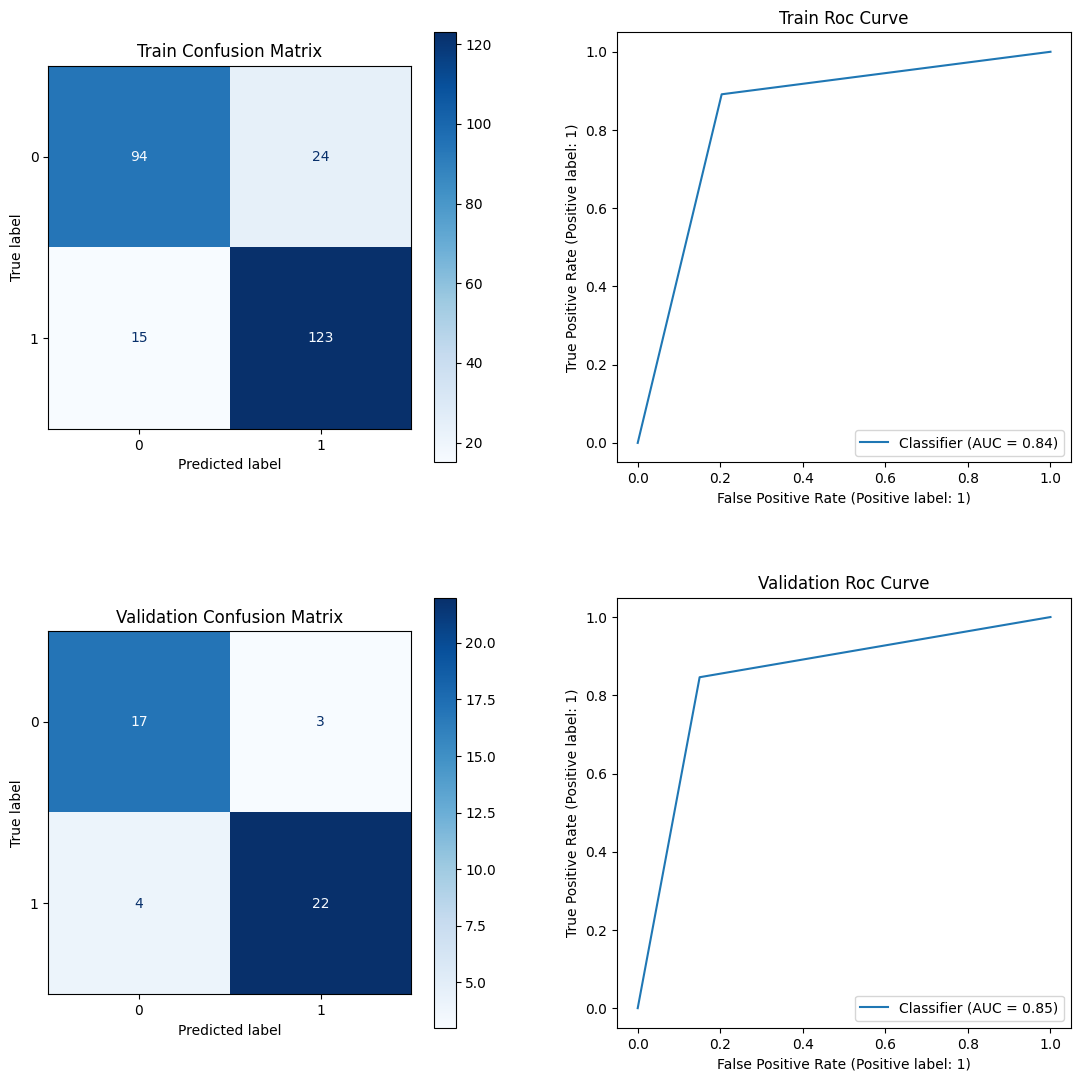

In [ ]:
xgb_tuned.fit(X_train, y_train)
results = pre_tuned_result_calculator(best_models_tuned[3], xgb_tuned)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

## Results

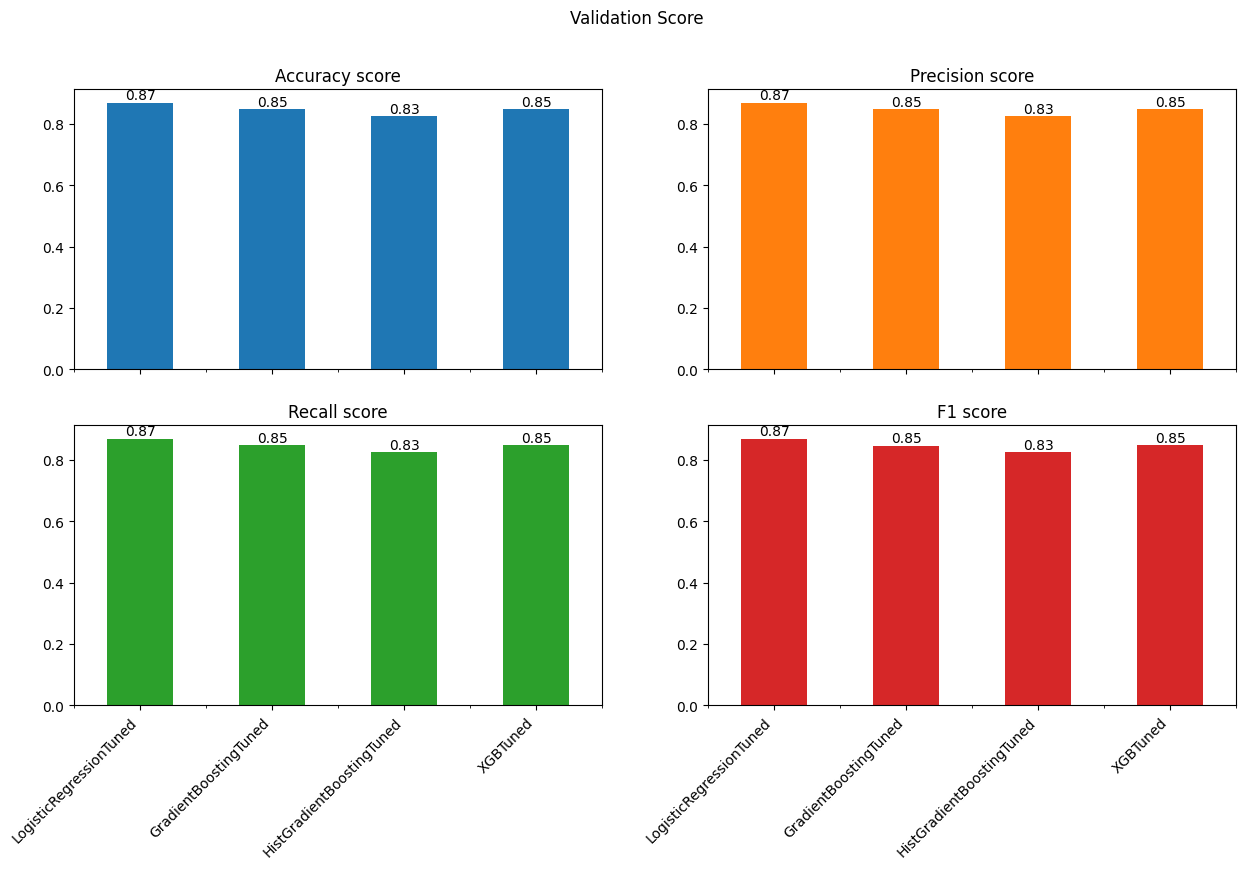

In [ ]:
# @title Graph

ax = pd.DataFrame(train_tuned_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Training Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(best_models_tuned, rotation=45, ha='right')

ax = pd.DataFrame(test_tuned_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Validation Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(best_models_tuned, rotation=45, ha='right');

## Bagging

In [ ]:
train_bagging_results, test_bagging_results = [], []

def pre_tuned_result_calculator(name, model):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_score = calculate_results(name, y_train, train_pred)
    test_score = calculate_results(name, y_test, test_pred)

    train_bagging_results.append(train_score)
    test_bagging_results.append(test_score)

    return (y_train, train_pred), \
     (y_test, test_pred), \
     pd.DataFrame(train_score, index=[0]), \
     pd.DataFrame(test_score, index=[0])

### Model 0 - Bagging with LogisticRegression

                  Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingLogisticRegression        0.820312         0.821192      0.820312   

   F1 score  
0  0.819479  
                  Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingLogisticRegression        0.913043         0.917161      0.913043   

   F1 score  
0  0.913375  


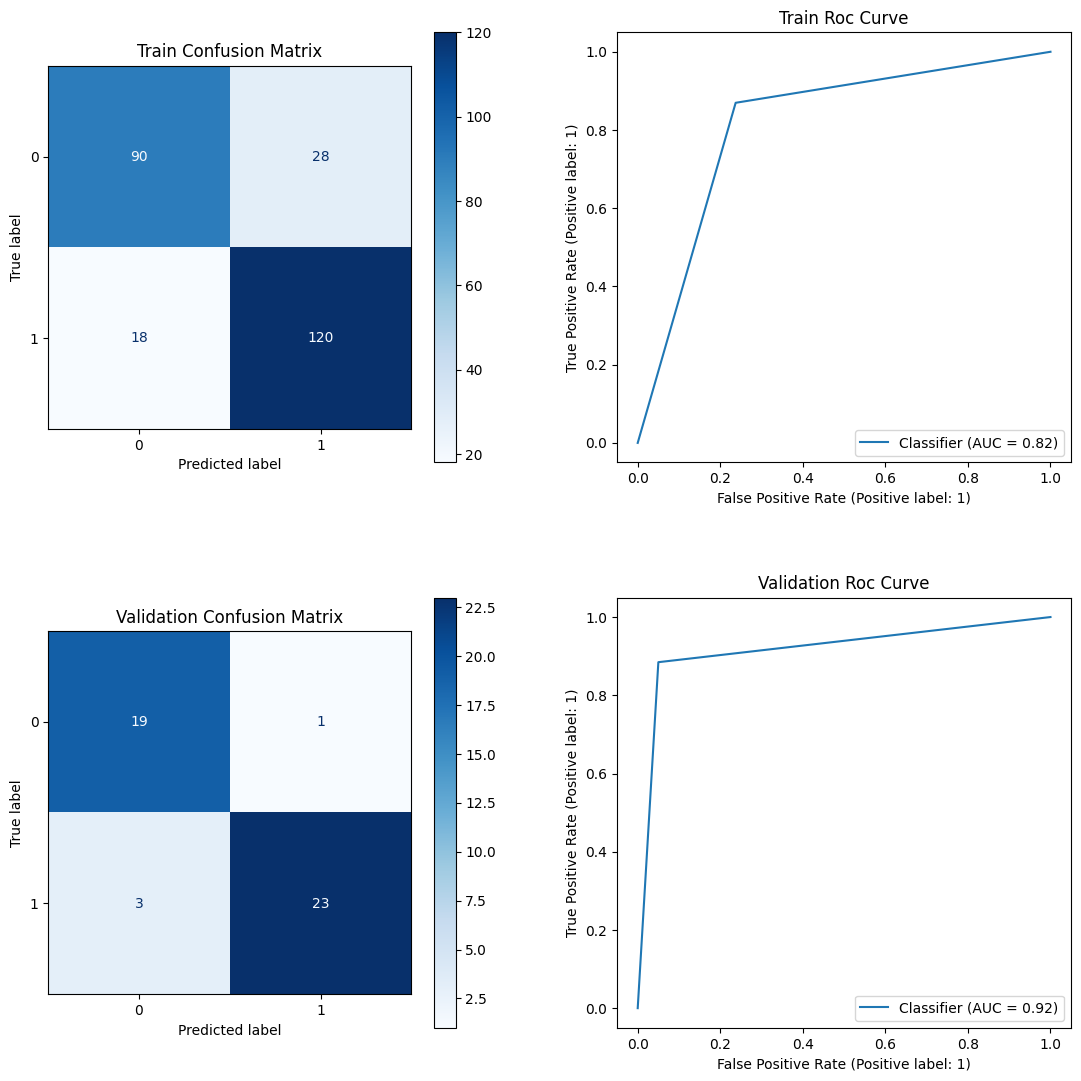

In [ ]:
bg_lr = BaggingClassifier(lr)
bg_lr.fit(X_train, y_train)

results = pre_tuned_result_calculator('Bagging' + best_models[0], bg_lr)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

### Model 1 - Bagging with GradientBoosting

                     Model Name  Accuracy score  Precision score  \
0  BaggingGradientBoostingTuned        0.941406         0.942495   

   Recall score  F1 score  
0      0.941406  0.941235  
                     Model Name  Accuracy score  Precision score  \
0  BaggingGradientBoostingTuned        0.826087         0.826087   

   Recall score  F1 score  
0      0.826087  0.826087  


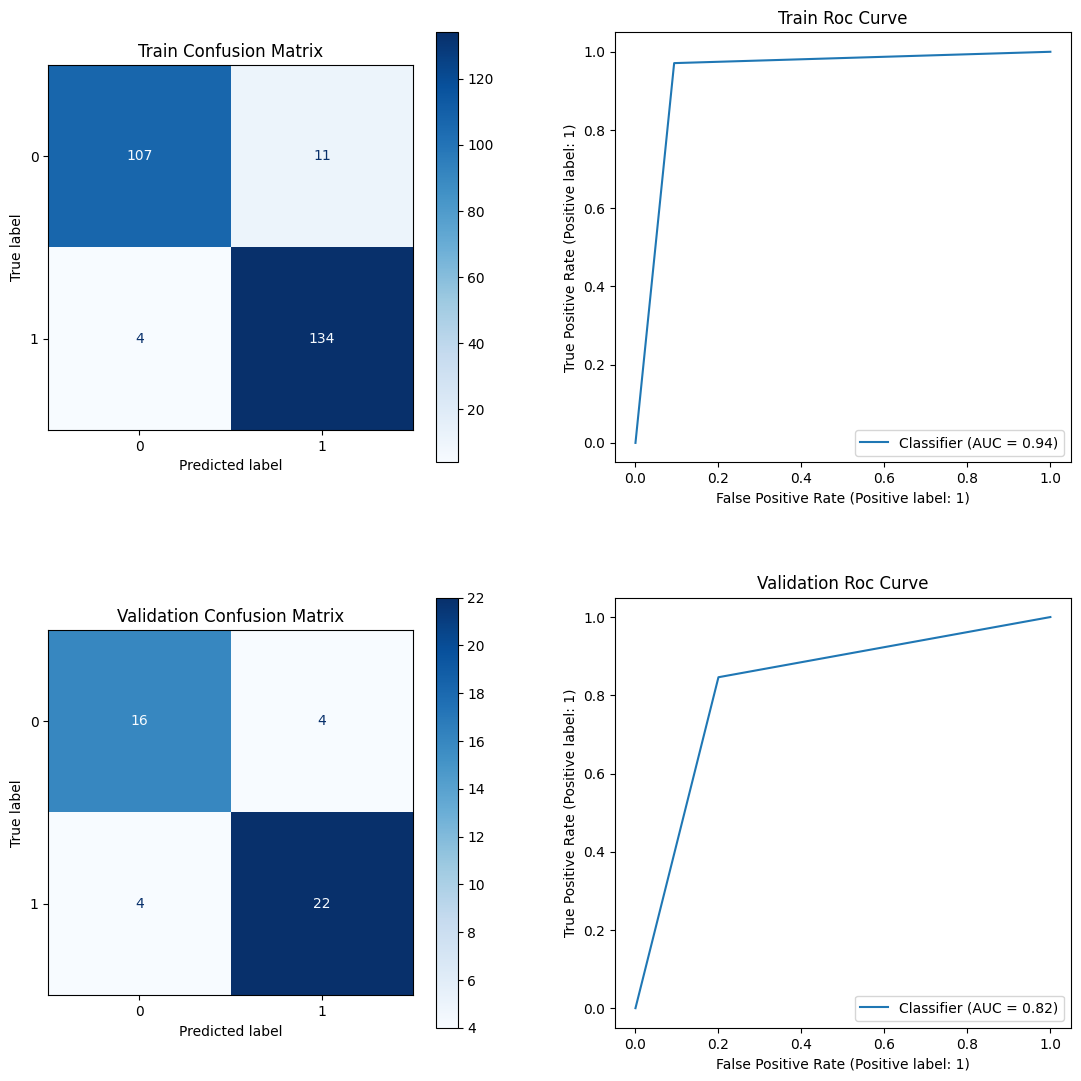

In [ ]:
bg_gb_tuned = BaggingClassifier(gb_tuned)
bg_gb_tuned.fit(X_train, y_train)

results = pre_tuned_result_calculator('Bagging' + best_models_tuned[1], bg_gb_tuned)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

### Model 2 - Bagging with HistGradientBoosting

In [ ]:
bg_hgb_tuned = BaggingClassifier(hgb)
bg_hgb_tuned.fit(X_train, y_train)

results = pre_tuned_result_calculator('Bagging' + best_models[2], bg_hgb_tuned)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

                    Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingHistGradientBoosting         0.96875          0.96875       0.96875   

   F1 score  
0   0.96875  
                    Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingHistGradientBoosting        0.847826         0.847614      0.847826   

   F1 score  
0  0.847311  


### Model 3 - Bagging with RandomForest

In [ ]:
bg_rf = BaggingClassifier(rf)
bg_rf.fit(X_train, y_train)

results = pre_tuned_result_calculator('Bagging' + best_models[3], bg_rf)
train, test = results[0], results[1]
train_score, test_score = results[2], results[3]

print(train_score)
print(test_score)
plot(train, test)

            Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingRandomForest        0.972656         0.972702      0.972656   

   F1 score  
0  0.972664  
            Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingRandomForest        0.847826         0.849358      0.847826   

   F1 score  
0   0.84819  


## Results

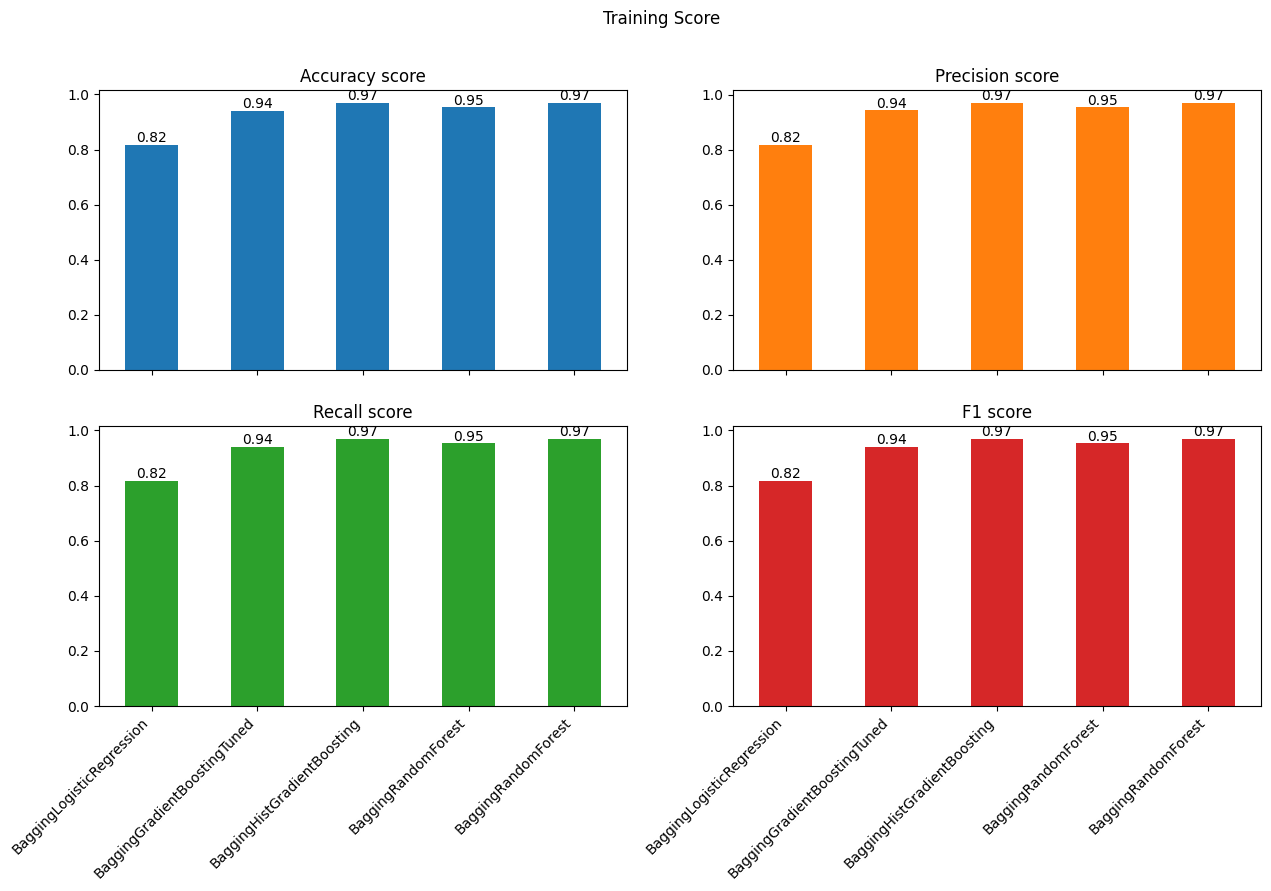

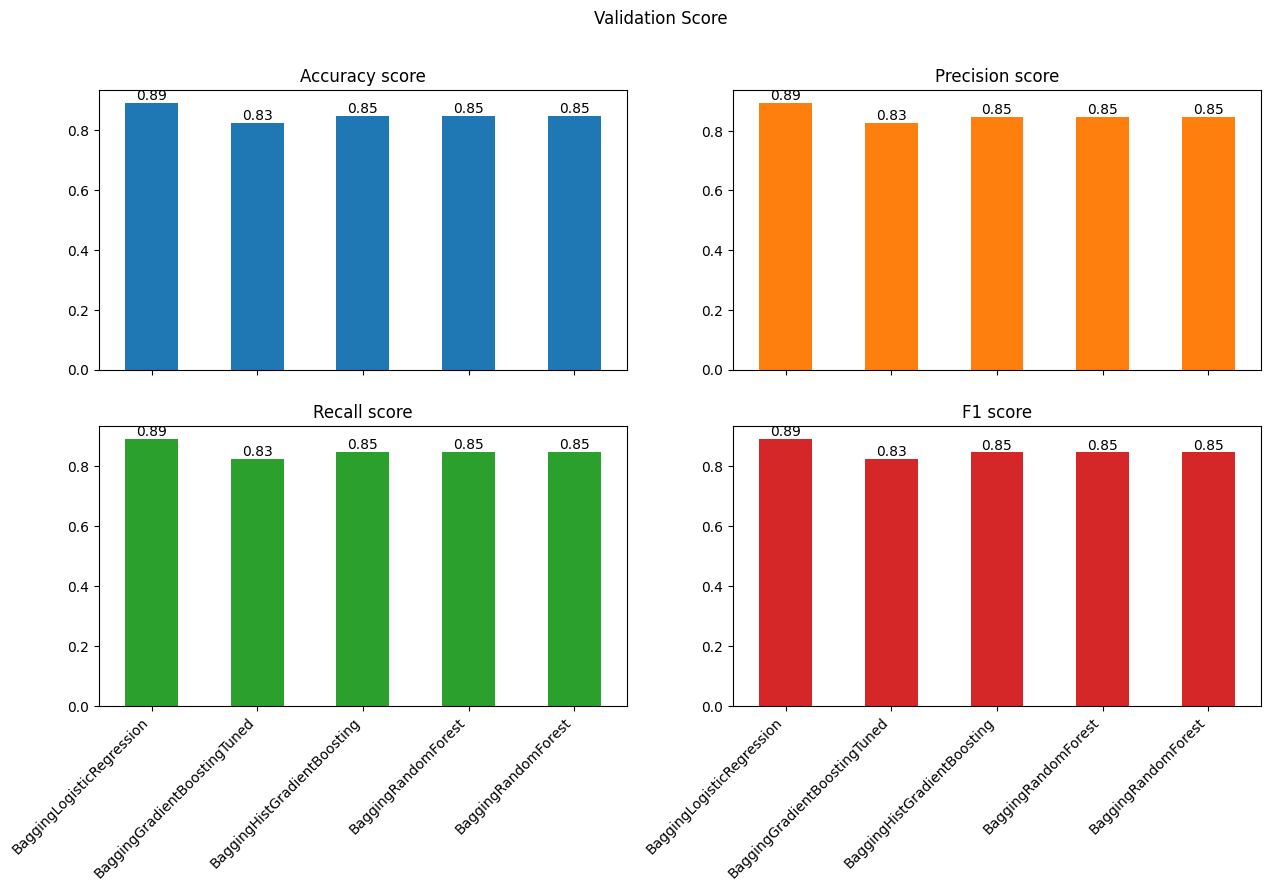

In [ ]:
# @title Graph

temp = pd.DataFrame(train_bagging_results)
ax = temp.plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Training Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(temp['Model Name'].values, rotation=45, ha='right')

temp = pd.DataFrame(test_bagging_results)
ax = temp.plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Validation Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(temp['Model Name'].values, rotation=45, ha='right');

## Conclusion:

### Comparing the scores of RandomForest and BaggingLogisticRegression

In [ ]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.8695652173913043)

In [ ]:
bg_lr.score(X_train, y_train), rf.score(X_test, y_test)

(0.8203125, 0.8695652173913043)

> I feel RandomForest is the best model

## Save the model

In [219]:
import joblib

filepath = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/1. ClassificationProjects/3. Heart Attack Analysis/best_model.joblib'
joblib.dump(rf, filepath)

['/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/1. ClassificationProjects/3. Heart Attack Analysis/best_model.joblib']

## Load the saved model

In [220]:
model = joblib.load(filepath)

model.score(X_test, y_test)

0.8695652173913043

---
---